In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import csv
import os
import sys

In [35]:
folder = "data_new_actions/"
name = "single_action_gyro_clockwise-rotation.csv"

In [3]:
mpl.rcParams['legend.fontsize'] = 10

In [4]:
def x_cube(theta):
    b = np.cos(theta)
    a = np.sin(theta)
    x = [0, b, b - a * 7, -a * 7, 0, 0, b, b, b, b - a * 7, b - a * 7, b - a * 7, -a * 7, -a * 7, -a * 7, 0]
    return x

In [5]:
def y_cube(theta):
    b = np.cos(theta)
    a = np.sin(theta)
    x = [0, a, a + b * 7,  b * 7,  0, 0, a, a, a, a + b * 7, a + b * 7, a + b * 7,  b * 7,  b * 7,  b * 7, 0]
    return x

In [6]:
def z_cube(theta):
    b = np.cos(theta)
    a = np.sin(theta)
    x = [0, 0, 0, 0, 0, 7, 7, 0, 7, 7, 0, 7, 7, 0, 7, 7]
    return x

In [7]:
%matplotlib notebook

In [8]:
def draw_cube(theta):
    x = x_cube(theta)
    y = y_cube(theta)
    z = z_cube(theta)
    return x, y, z

In [9]:
def update(i):
    row = data[i]
    theta += np.arctan(float(row[1])/ 
                      np.sqrt(float(row[0]) * float(row[0]) + 
                              float(row[1]) * float(row[1])))
    x, y, z = draw_cube(theta)
    return ax.set_3d_properties([x, z, y])


In [36]:
def load_data():
    return pd.read_csv(folder + name, sep=',', header=None).values

In [37]:
data = load_data()
theta = 0

<IPython.core.display.Javascript object>


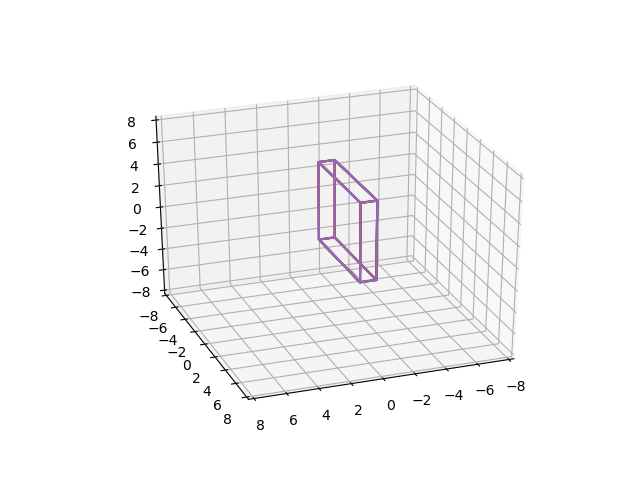

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(-8, 8)
ax.view_init(30, 70)
x, y, z = draw_cube(theta)
ax.plot(x, y, z)
line_ani = animation.FuncAnimation(fig, update, 25,
                                   interval=50, blit=False)
plt.show()

# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
#anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
#anim.save('line.gif', dpi=80, writer='imagemagick')

In [15]:

print('matplotlib: '+matplotlib.__version__)

matplotlib: 3.1.1


In [87]:
def update_plot(frame_number, plot):
    row = data[frame_number]
    theta = np.arctan(float(row[1])/ 
                      np.sqrt(float(row[0]) * float(row[0]) + 
                              float(row[1]) * float(row[1])))
    x, y, z = draw_cube(theta)
    #plot[0].set_xdata(x)
    #plot[0].set_ydata(z)
    #plot[0].set_3d_properties(y)
    plot.remove(plot[0])
    ax.cla()
    ax.set_xlim3d(-8, 8)
    ax.set_ylim3d(-8, 8)
    ax.set_zlim3d(-8, 8)
    plot.append(ax.plot(x, z, y))

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
x, y, z = draw_cube(0)
ax.cla()
ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(-8, 8)
#ax.view_init(30, 70)
plot = [ax.plot(x, z, y, color='0.75')]
theta = 0
#ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, 1000, fargs=(plot), interval=100)

In [88]:
fn = 'plot_surface_animation_funcanimation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=10)
ani.save(fn+'.gif',writer='imagemagick',fps=10)

In [89]:
plt.rcParams['animation.html'] = 'html5'
ani

In [83]:
#https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-funcanimation-matplotlib.html